In [1]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely
!pip install chart-studio

In [47]:
import plotly.figure_factory as ff
import geopandas as gp
import numpy as np
import pandas as pd
import plotly.offline as py
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot

In [3]:
# https://chart-studio.plotly.com/~jackp/18292/plotting-d3js-county-choropleth-maps-in/#/
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

df = gp.read_file('Resources/cb_2018_us_zcta510_500k.shp')

In [13]:
df.tail
df.dtypes

ZCTA5CE10     object
AFFGEOID10    object
GEOID10       object
ALAND10        int64
AWATER10       int64
geometry      object
dtype: object

In [5]:
type(df["geometry"])

geopandas.geoseries.GeoSeries

In [14]:
x,y=df['geometry'][3].exterior.xy

Polygon


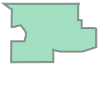

In [15]:
print(df['geometry'][24].type)
df['geometry'][24]

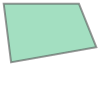

In [16]:
df['geometry'][24].simplify(0.2)

In [9]:
df['geometry'][18].exterior.xy[1][0]

33.302729

In [10]:
# Center Point
df['geometry'][24].centroid.xy

(array('d', [-88.41944909283772]), array('d', [42.45620838199368]))

In [35]:
# Created Pandas DataFrame to rename (ZCTA5CE10 as Zipcode)

df_pd = pd.DataFrame(df)
df_pd = df_pd.rename(columns={"ZCTA5CE10":"Zipcode"})

In [36]:
df_pd.columns

Index(['Zipcode', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10', 'geometry'], dtype='object')

In [37]:
# Converted df Zipcode column to int

df_pd["Zipcode"] = df_pd["Zipcode"].astype(int)

In [38]:
# Saving a CSV file named "california_census_data"

california_data = pd.read_csv("Resources/california_census_data.csv")

In [39]:
# Converted df Zipcode column to int

california_data["Zipcode"] = california_data["Zipcode"].astype(int)

In [40]:
california_merged = pd.merge(df_pd, california_data, how="inner", on="Zipcode")
# type(california_data["Zipcode"][1])

In [41]:
california_merged.head()

,Zipcode,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Population,Poverty Count,poverty_male,poverty_female,...,poverty_family_single_female,employment_labor_force,employment_not_labor_force,employment_employed,employment_unemployed,Poverty Rate,index,City,County,Type
0,93308,8600000US93308,93308,818436705,1790905,"(POLYGON ((-118.963713 35.595182, -118.960574 ...",54042.0,12454.0,5351.0,7103.0,...,1549.0,23030.0,17946.0,20097.0,2921.0,23.045039,1197,Bakersfield,Kern,Standard
1,93060,8600000US93060,93060,307974335,2959287,"POLYGON ((-119.268089 34.47578, -119.266678 34...",34226.0,5412.0,2532.0,2880.0,...,550.0,16746.0,8813.0,15336.0,1410.0,15.812540,1087,Santa Paula,Ventura,Standard
2,93960,8600000US93960,93960,528427594,13212990,"POLYGON ((-121.563805 36.49934, -121.554078 36...",26788.0,2374.0,1008.0,1366.0,...,110.0,7191.0,14019.0,6745.0,446.0,8.862177,1469,Soledad,Monterey,Standard
3,93235,8600000US93235,93235,7462346,0,"POLYGON ((-119.233867 36.38523, -119.233662 36...",3804.0,1306.0,743.0,563.0,...,36.0,1534.0,1291.0,1385.0,149.0,34.332282,1143,Ivanhoe,Tulare,Standard
4,93622,8600000US93622,93622,918202049,5458455,"(POLYGON ((-120.794441 36.893821, -120.781957 ...",10298.0,2766.0,1220.0,1546.0,...,352.0,4746.0,2722.0,4005.0,741.0,26.859584,1339,Firebaugh,Fresno,Standard


In [25]:
type(california_merged["geometry"])

pandas.core.series.Series

In [26]:
type(california_merged)

pandas.core.frame.DataFrame

In [27]:
california_geodata = gp.GeoDataFrame(california_merged, geometry='geometry')
california_geodata.head()

,Zipcode,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Population,Poverty Count,poverty_male,poverty_female,...,poverty_family_single_female,employment_labor_force,employment_not_labor_force,employment_employed,employment_unemployed,Poverty Rate,index,City,County,Type
0,93308,8600000US93308,93308,818436705,1790905,"(POLYGON ((-118.963713 35.595182, -118.960574 ...",54042.0,12454.0,5351.0,7103.0,...,1549.0,23030.0,17946.0,20097.0,2921.0,23.045039,1197,Bakersfield,Kern,Standard
1,93060,8600000US93060,93060,307974335,2959287,"POLYGON ((-119.268089 34.47578, -119.266678 34...",34226.0,5412.0,2532.0,2880.0,...,550.0,16746.0,8813.0,15336.0,1410.0,15.812540,1087,Santa Paula,Ventura,Standard
2,93960,8600000US93960,93960,528427594,13212990,"POLYGON ((-121.563805 36.49934, -121.554078 36...",26788.0,2374.0,1008.0,1366.0,...,110.0,7191.0,14019.0,6745.0,446.0,8.862177,1469,Soledad,Monterey,Standard
3,93235,8600000US93235,93235,7462346,0,"POLYGON ((-119.233867 36.38523, -119.233662 36...",3804.0,1306.0,743.0,563.0,...,36.0,1534.0,1291.0,1385.0,149.0,34.332282,1143,Ivanhoe,Tulare,Standard
4,93622,8600000US93622,93622,918202049,5458455,"(POLYGON ((-120.794441 36.893821, -120.781957 ...",10298.0,2766.0,1220.0,1546.0,...,352.0,4746.0,2722.0,4005.0,741.0,26.859584,1339,Firebaugh,Fresno,Standard


In [28]:
type(california_geodata)

geopandas.geodataframe.GeoDataFrame

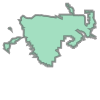

In [29]:
california_geodata['geometry'][4]

In [32]:
df_poverty_plot = california_geodata[["Poverty Rate","geometry"]]

In [33]:
df_poverty_plot

,Poverty Rate,geometry
0,23.045039,"(POLYGON ((-118.963713 35.595182, -118.960574 ..."
1,15.812540,"POLYGON ((-119.268089 34.47578, -119.266678 34..."
2,8.862177,"POLYGON ((-121.563805 36.49934, -121.554078 36..."
3,34.332282,"POLYGON ((-119.233867 36.38523, -119.233662 36..."
4,26.859584,"(POLYGON ((-120.794441 36.893821, -120.781957 ..."
...,...,...
1546,20.903955,"POLYGON ((-118.520199 35.590619, -118.517176 3..."
1547,26.139621,"POLYGON ((-117.454468 33.791972, -117.453958 3..."
1548,14.232509,"(POLYGON ((-118.291644 34.063683, -118.289914 ..."
1549,24.818928,"POLYGON ((-119.448018 35.500528, -119.439288 3..."


<IPython.core.display.Javascript object>


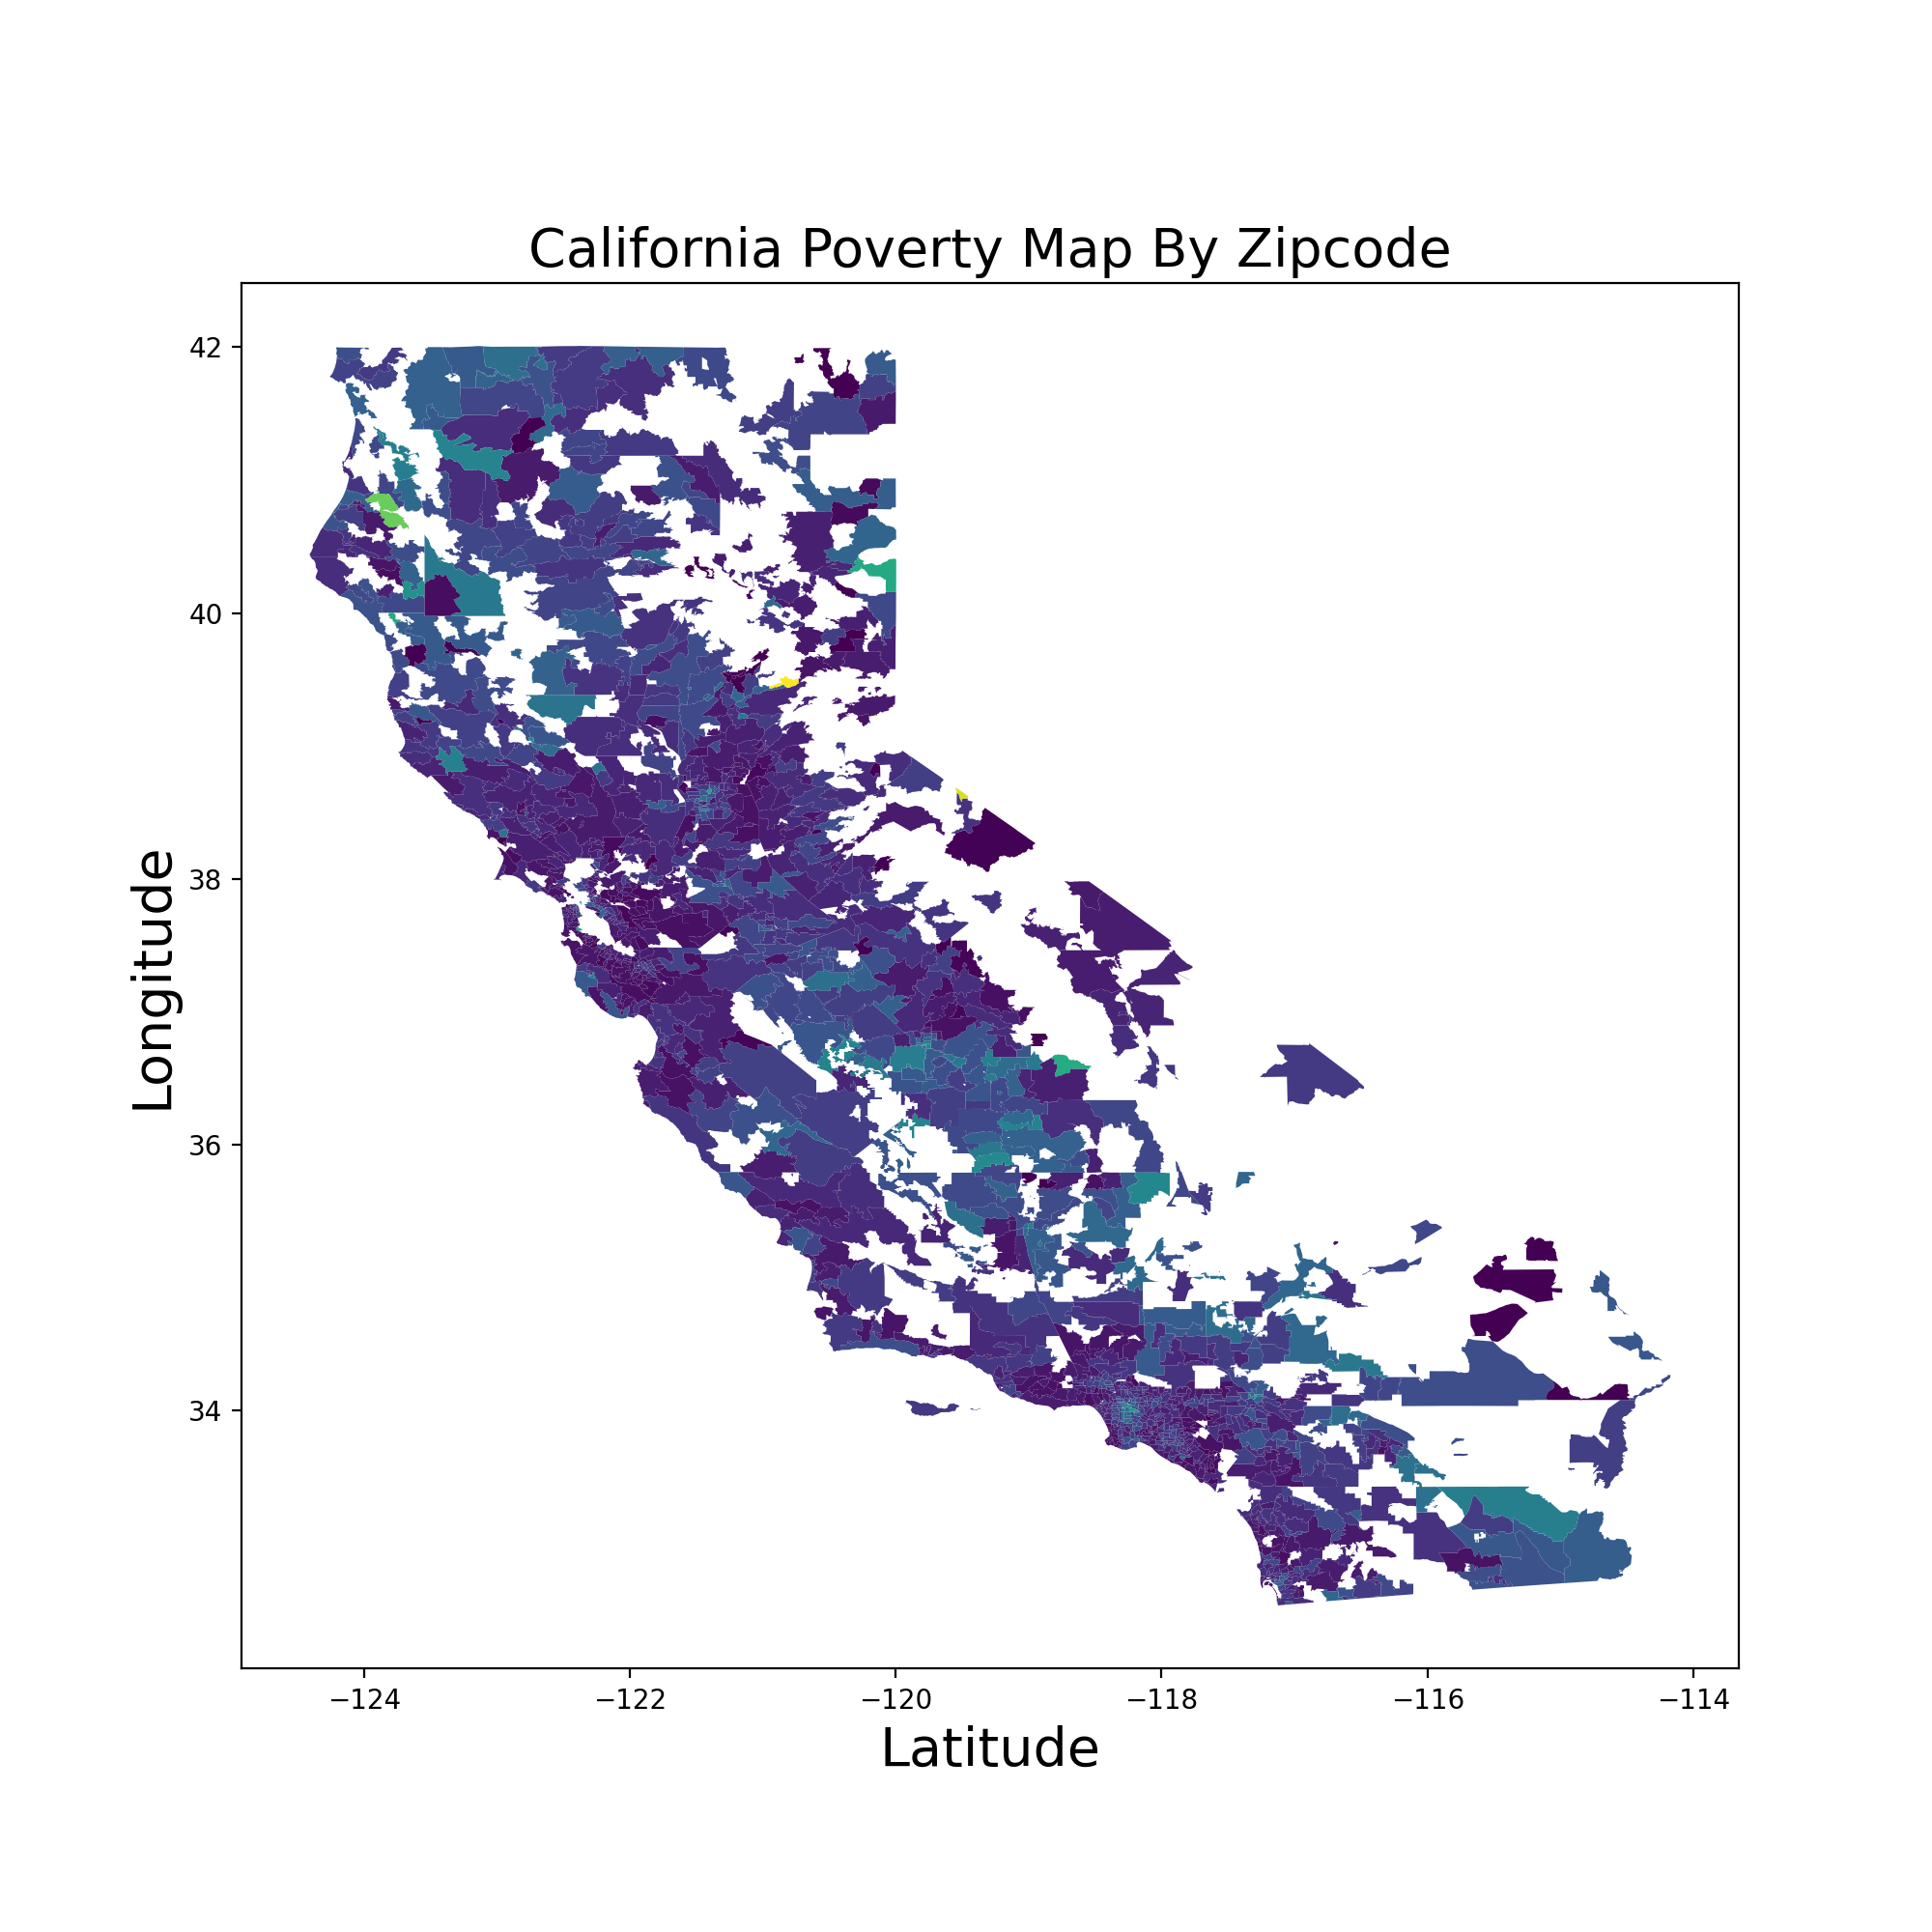

In [96]:
%matplotlib notebook
import matplotlib.pyplot as plt

# import mpld3
# mpld3.enable_notebook()
# plt.rcParams['figure.figsize'] = [10,10]

df_poverty_plot.plot(figsize=(10,10), column='Poverty Rate');
plt.title("California Poverty Map By Zipcode", fontsize=20);
plt.xlabel("Latitude", fontsize=20);
plt.ylabel("Longitude", fontsize=20);

plt.savefig("Choropleth Map By Zipcode")

In [ ]:
# Saving a CSV file named "california_merged_data"

california_merged.to_csv("Resources/california_merged_data.csv", encoding="utf-8", index=False)

In [ ]:
import plotly.figure_factory as ff
import geopandas as gp
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

# import numpy as np
# import pandas as pd

df_f = gp.read_file('Resources/california_census_data.csv')

In [ ]:
# Problem - Geometry coordinates were knocked off

df_f.head(20)

In [ ]:
type(df_f["geometry"])

In [ ]:
df_f['geometry']

# df_f["Zipcode"]['90242']

In [ ]:
type(df_f)

In [ ]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

# df_sample = pd.read_shp('cb_2018_us_zcta510_500k.shp')
# df_sample_r = df_sample[df_sample['STNAME'] == 'California']

# values = df_sample_r['TOT_POP'].tolist()
# fips = df_sample_r['FIPS'].tolist()

# endpts = list(np.mgrid[min(values):max(values):4j])
# colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
#               "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['California'], show_state_data=True,
#     colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
#     legend_title='Population by County',
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     exponent_format=True,
# )
# fig.layout.template = None
# fig.show()

In [ ]:
# colorscale = [
#     'rgb(193, 193, 193)',
#     'rgb(239,239,239)',
#     'rgb(195, 196, 222)',
#     'rgb(144,148,194)',
#     'rgb(101,104,168)',
#     'rgb(65, 53, 132)']

# values = df_sample_r['TOT_POP'].tolist()
# fips = df_sample_r['FIPS'].tolist()

# endpts = list(np.mgrid[min(values):max(values):4j])
# colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
#               "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
# fig = ff.create_choropleth(
#     fips=fips, values=values, scope=['California'], show_state_data=True,
#     colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
#     legend_title='Population by County',
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
#     exponent_format=True,
# )
# fig.layout.template = None
# fig.show()